<a href="https://colab.research.google.com/github/Soufian13/SEE_Sentiment_Extraction_Experts/blob/main/changed_amazon_books_review_eda_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amazon Books Review Analysis

#   * Mount drive, link your folder and navigate to /project folder ( *new)

In [5]:
# RUN THIS COMMAND ONLY IF YOU USE GOOGLE COLAB.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
# RUN THIS COMMAND ONLY IF YOU USE GOOGLE COLAB.
%cd /content/drive/MyDrive/AI_Projekt_24/

/content/drive/MyDrive/AI_Projekt_24


In [1]:
import os

basispfad = "/content/drive/MyDrive"
ordnername = "AI_Projekt_24"

vollständiger_pfad = os.path.join(basispfad, ordnername)
print(vollständiger_pfad)  # Ausgabe: /content/drive/MyDrive/AI_Projekt_24

/content/drive/MyDrive/AI_Projekt_24


## Importing Dependencies

In [ ]:
!pip install vaderSentiment
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.3 MB/s eta 0:00:00


## Reading Data from file

In [ ]:
#br = pd.read_csv(r"/Data/Raw/Books_rating.csv")
bd = pd.read_csv(r"/content/drive/MyDrive/AI_Projekt_24/Data/Raw/books_data.csv")

In [ ]:
bd.head(5)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [ ]:
bd.head(5)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


## **Data Pre-Processing**

### Merging both the dataset

In [ ]:
books = pd.merge(br,bd, on = 'Title')
books.shape

(3000000, 19)

### extracting useful columns

In [ ]:
df = books[['Title','review/score','review/text','authors','categories','ratingsCount']]

### Dropping Duplicates

In [ ]:
df.drop_duplicates(inplace = True)
df.shape

/tmp/ipykernel_42/3208856916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace = True)


(2617289, 6)

In [ ]:
df.isna().sum()

Title               207
review/score          0
review/text           8
authors          350198
categories       465848
ratingsCount    1234897
dtype: int64

### Dropping Null Values

In [ ]:
df.dropna(inplace = True)
df.isna().sum()

/tmp/ipykernel_42/1508174486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


Title           0
review/score    0
review/text     0
authors         0
categories      0
ratingsCount    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1325891 entries, 47 to 2999999
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Title         1325891 non-null  object 
 1   review/score  1325891 non-null  float64
 2   review/text   1325891 non-null  object 
 3   authors       1325891 non-null  object 
 4   categories    1325891 non-null  object 
 5   ratingsCount  1325891 non-null  float64
dtypes: float64(2), object(4)
memory usage: 70.8+ MB


In [ ]:
df.shape

(1325891, 6)

### Using only the fraction of dataset to reduce the running time on big data

In [ ]:
data = df.sample(15000)
data.shape

(15000, 6)

### Removing brackets and colons from authors name

In [ ]:
data['authors'] = data['authors'].str.extract(r'\'(.*)\'')

### Removes brackets and colons from categories

In [ ]:
data['categories'] = data['categories'].str.extract(r'\'(.*)\'')

### Counting the length of each review

In [ ]:
data['word_count'] = data['review/text'].apply(lambda x: len(x.split(' ')))

In [ ]:
data.head()

,Title,review/score,review/text,authors,categories,ratingsCount,word_count
1247795,"Mayflower : A Story of Courage, Community, and...",2.0,It's so much more than just about a boat named...,Nathaniel Philbrick,History,27.0,35
943881,THE TREASURED WRITINGS OF KAHLIL GIBRAN,5.0,I found this book to contain many of the best ...,Kahlil Gibran,Mysticism,1.0,40
2252860,The Tipping Point: How Little Things Can Make ...,5.0,This book should become required reading for m...,Malcolm Gladwell,Reference,4218.0,153
1389056,Holes,4.0,Holes is about a boy named Stanley Yelnats and...,Louis Sachar,Juvenile Fiction,105.0,73
2658806,The Lord of the Rings Trilogy 3 Volumes,5.0,A chance to have a readily-readable format ava...,John Ronald Reuel Tolkien,"Baggins, Frodo (Fictitious character)",98.0,22


In [ ]:
## data.to_csv('sample.csv', index=False)

# **EDA**

## Distribution of Books in Market based on Genre

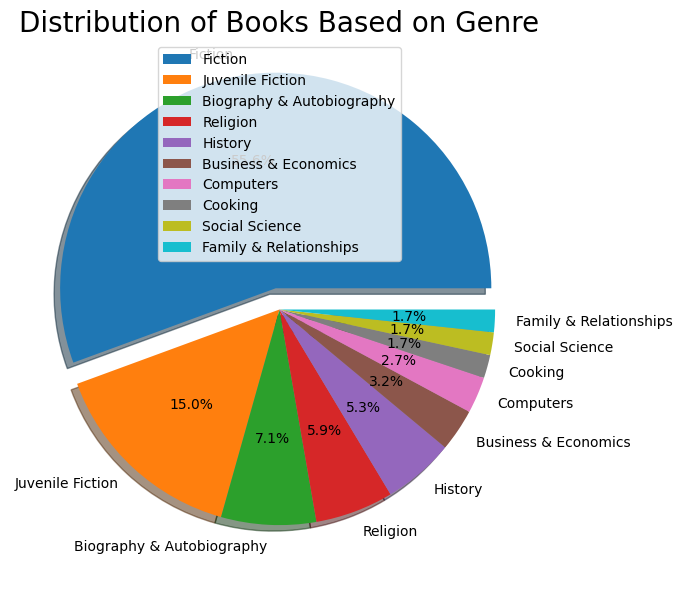

In [ ]:
plt.figure(figsize=(7,7))
labels=['Fiction','Juvenile Fiction','Biography & Autobiography','Religion','History','Business & Economics','Computers','Cooking','Social Science','Family & Relationships']
plt.pie(data['categories'].value_counts().head(10),explode=(0.1,0,0,0,0,0,0,0,0,0), labels=labels,autopct='%1.1f%%', shadow=True)
plt.title('Distribution of Books Based on Genre', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

## Most frequent Words in over 3 rated Reviews

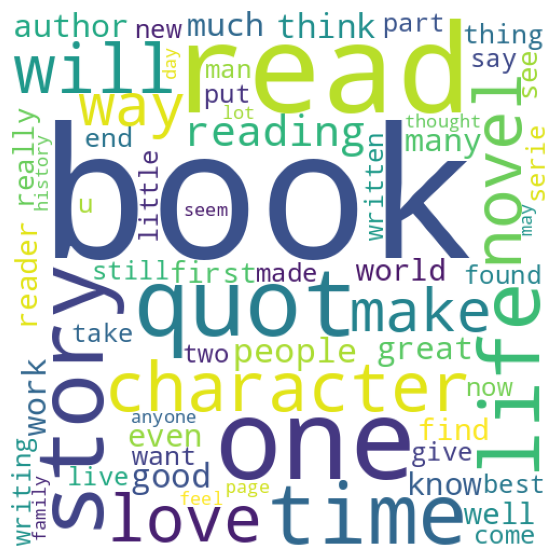

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(width=500,height=500,min_font_size=15,background_color='white')
spam_wc = wc.generate(data[data['review/score'] > 3]['review/text'].str.cat(sep=" "))

plt.figure(figsize=(7,7))
plt.axis('off')
plt.imshow(spam_wc)

## Most Reviewed Books

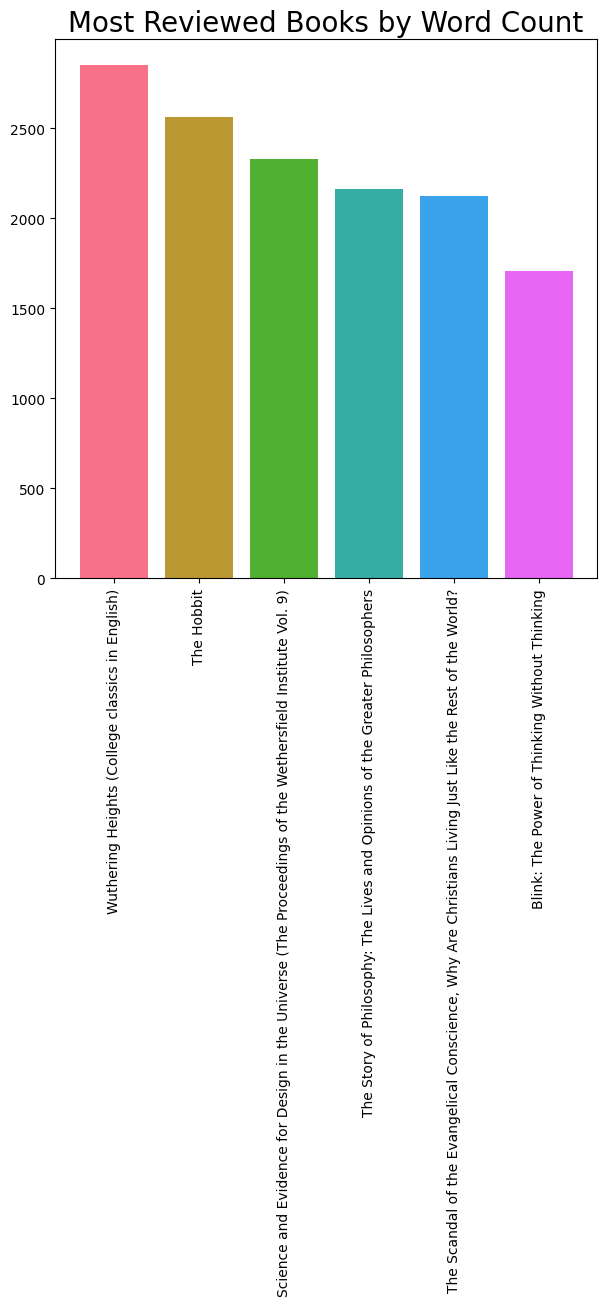

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7, 7))
cou = data[data['word_count'] > 1707][['Title', 'word_count']].sort_values(by='word_count', ascending=False)
colors = sns.color_palette('husl', n_colors=len(cou))
bars = plt.bar(cou['Title'], cou['word_count'], color=colors)
plt.title('Most Reviewed Books by Word Count', fontsize=20)
plt.xticks(rotation=90)
plt.show()

## Highest Rated Books with over 4000 ratings each Book

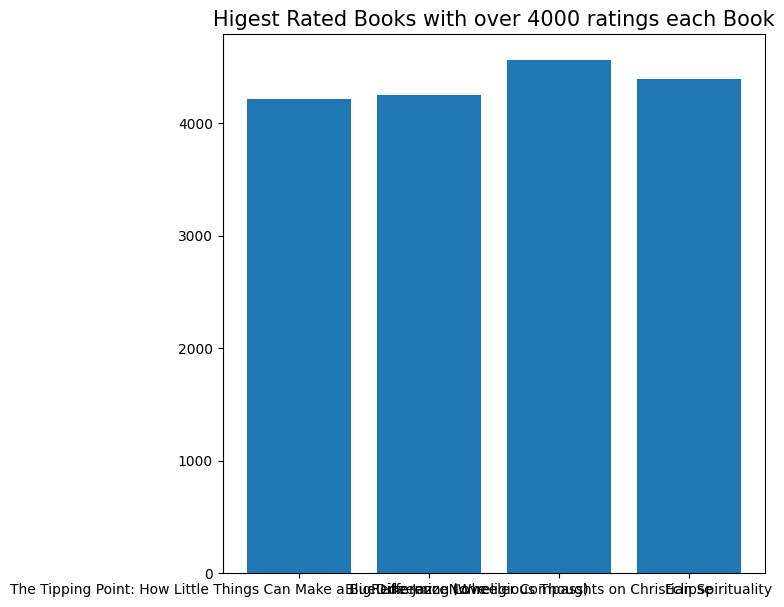

In [ ]:
plt.figure(figsize = (7, 7))
rating_counts = data[data['ratingsCount'] > 4000][['Title','ratingsCount']].drop_duplicates()
plt.bar(rating_counts['Title'],rating_counts['ratingsCount'])
plt.title('Higest Rated Books with over 4000 ratings each Book', fontsize = 15)
plt.show()

## In which Genres readers give Positive and Negative Ratings

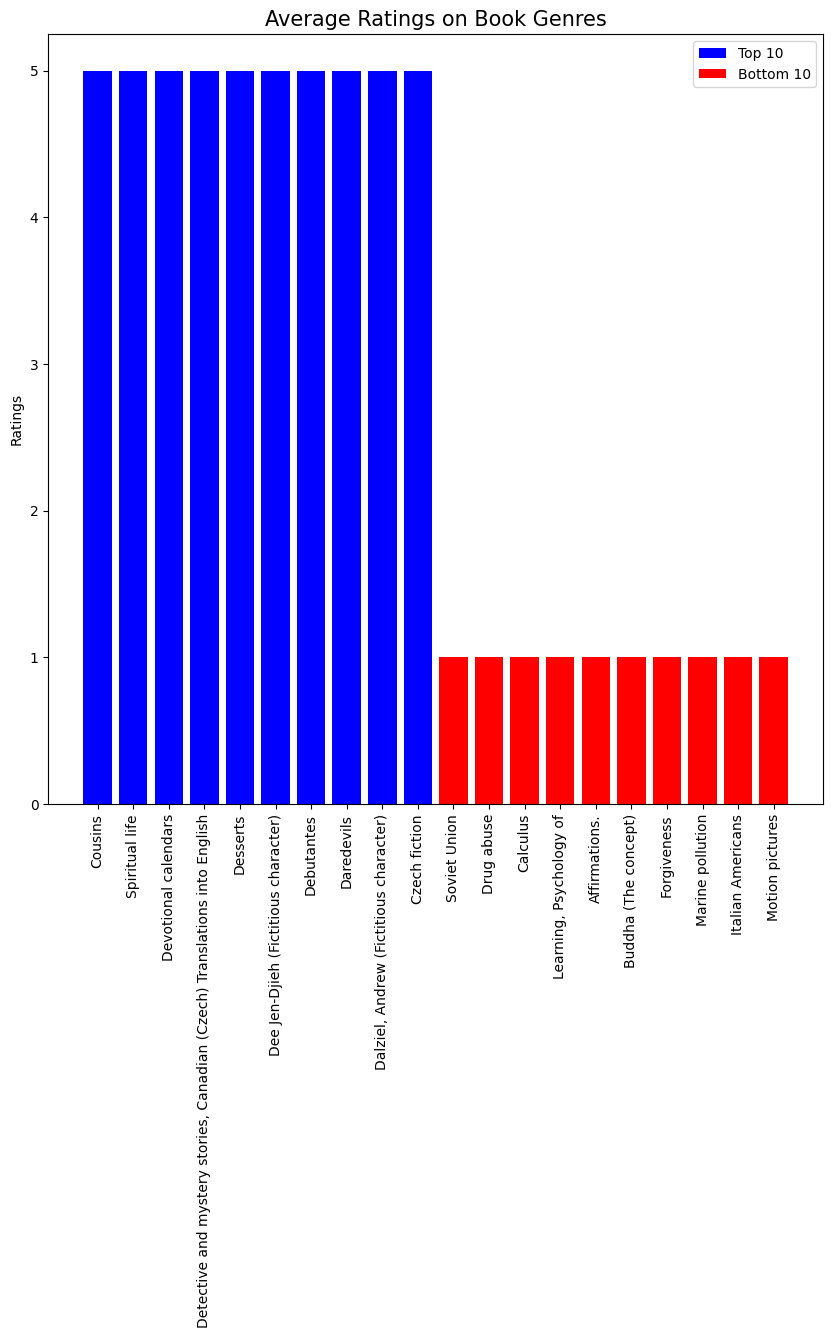

In [ ]:
# Convert 'review/score' column to numeric (if applicable)
data['review/score'] = pd.to_numeric(data['review/score'], errors='coerce')

# Filter out non-numeric values (if any)
numeric_data = data.dropna(subset=['review/score'])

# Group by 'categories' and compute the mean of 'review/score'
avg_cat_rating = numeric_data.groupby('categories')['review/score'].mean().sort_values(ascending=False).head(10)
avg_cat_rating_d = numeric_data.groupby('categories')['review/score'].mean().sort_values().head(10)

# Plot the bar chart for top and bottom categories
plt.figure(figsize=(10, 10))
plt.bar(avg_cat_rating.index, avg_cat_rating, color='blue', label='Top 10')
plt.bar(avg_cat_rating_d.index, avg_cat_rating_d, color='red', label='Bottom 10')
plt.title('Average Ratings on Book Genres', fontsize=15)
plt.xticks(rotation='vertical')
plt.ylabel('Ratings')
plt.legend()
plt.show()

## Top 10 Authors with 5 star Ratings

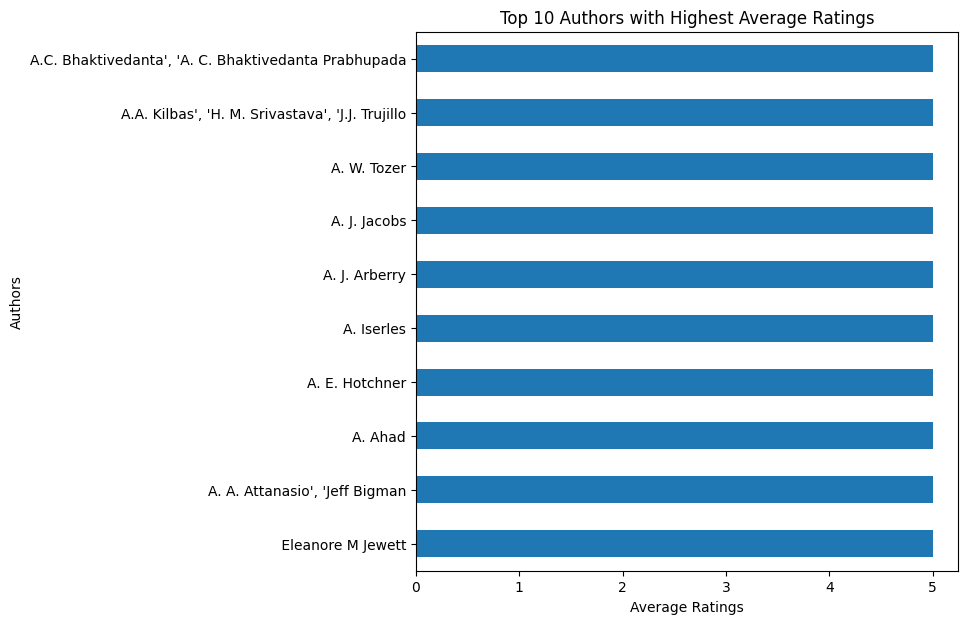

In [ ]:
# Convert 'review/score' column to numeric, coercing errors to NaN
data['review/score'] = pd.to_numeric(data['review/score'], errors='coerce')

# Group by 'authors', compute the mean of 'review/score', and plot the top 10 authors
top_authors = data.groupby('authors')['review/score'].mean().nlargest(10)
top_authors.plot(kind='barh', figsize=(7, 7))
plt.title('Top 10 Authors with Highest Average Ratings')
plt.xlabel('Average Ratings')
plt.ylabel('Authors')
plt.show()

## Top 10 Authors with 1 star Ratings

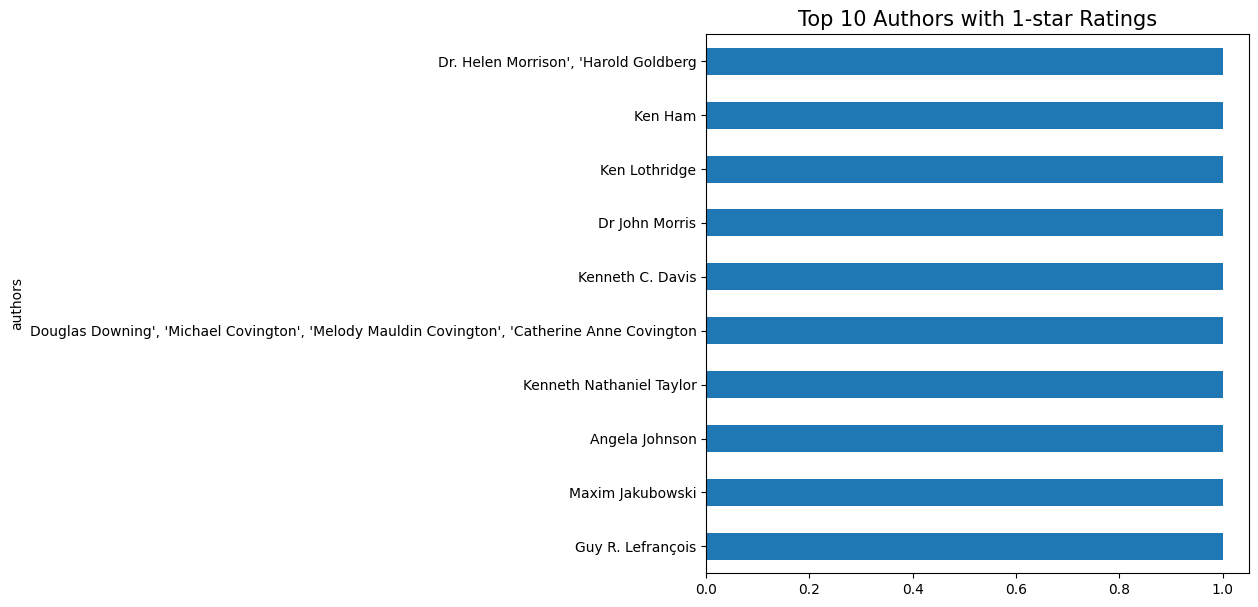

In [ ]:
# Grouping the data by authors and calculating the mean review score for each author
average_scores_by_author = data.groupby('authors')['review/score'].mean()

# Sorting the authors based on their average review scores and selecting the bottom 10 (lowest scores)
bottom_10_authors = average_scores_by_author.sort_values(ascending=True).head(10)

# Creating a horizontal bar plot to show the top 10 authors with the lowest average review scores
bottom_10_authors.plot(kind='barh', figsize=(7,7))

# Setting the title for the plot
plt.title('Top 10 Authors with 1-star Ratings', fontsize=15)

# Displaying the plot
plt.show()


## Number of Books written by each Author

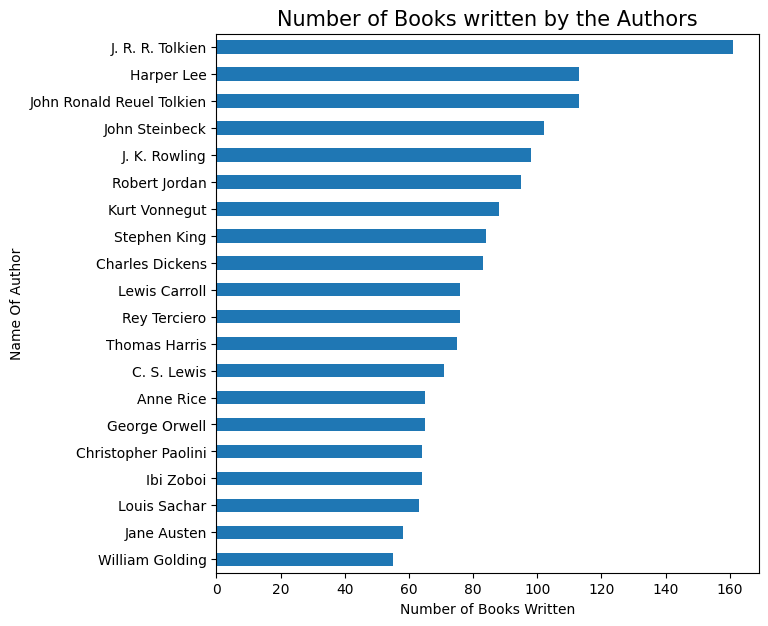

In [ ]:
data['authors'].value_counts().head(20).sort_values(ascending = True).plot(kind='barh', figsize=(7,7))
plt.title('Number of Books written by the Authors', fontsize = 15)
plt.ylabel('Name Of Author')
plt.xlabel('Number of Books Written')
plt.show()

# **Sentiment Analysis**

In [ ]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

In [ ]:
data.head(2)

,Title,review/score,review/text,authors,categories,ratingsCount,word_count
1247795,"Mayflower : A Story of Courage, Community, and...",2.0,It's so much more than just about a boat named...,Nathaniel Philbrick,History,27.0,35
943881,THE TREASURED WRITINGS OF KAHLIL GIBRAN,5.0,I found this book to contain many of the best ...,Kahlil Gibran,Mysticism,1.0,40


In [ ]:
# Lower casing the reviews
data['clean_reviews'] = data['review/text'].str.lower()
# Calculating Polarity score of reviews
data['score'] = data['clean_reviews'].apply(lambda review: vader.polarity_scores(review))
# Extracting compound column
data['compound']  = data['score'].apply(lambda score_dict: score_dict['compound'])

In [ ]:
# if compound value is more than 0.05 then it precive as positive
# if compound value is less than -0.0 then it precive as negative
# if compound value is equal to 0.0 then it precive as neutral

data['Sentiment'] = data['compound'].apply(lambda x: 'positive' if x >= 0.05 else 'negative' if x < -0.05 else 'neutral')
data.head()

,Title,review/score,review/text,authors,categories,ratingsCount,word_count,clean_reviews,score,compound,Sentiment
1247795,"Mayflower : A Story of Courage, Community, and...",2.0,It's so much more than just about a boat named...,Nathaniel Philbrick,History,27.0,35,it's so much more than just about a boat named...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
943881,THE TREASURED WRITINGS OF KAHLIL GIBRAN,5.0,I found this book to contain many of the best ...,Kahlil Gibran,Mysticism,1.0,40,i found this book to contain many of the best ...,"{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'comp...",0.8860,positive
2252860,The Tipping Point: How Little Things Can Make ...,5.0,This book should become required reading for m...,Malcolm Gladwell,Reference,4218.0,153,this book should become required reading for m...,"{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'comp...",0.9931,positive
1389056,Holes,4.0,Holes is about a boy named Stanley Yelnats and...,Louis Sachar,Juvenile Fiction,105.0,73,holes is about a boy named stanley yelnats and...,"{'neg': 0.049, 'neu': 0.788, 'pos': 0.163, 'co...",0.8945,positive
2658806,The Lord of the Rings Trilogy 3 Volumes,5.0,A chance to have a readily-readable format ava...,John Ronald Reuel Tolkien,"Baggins, Frodo (Fictitious character)",98.0,22,a chance to have a readily-readable format ava...,"{'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compou...",0.5267,positive


## Distribution of Negative, Neutral and Positive Sentiment in whole corpus

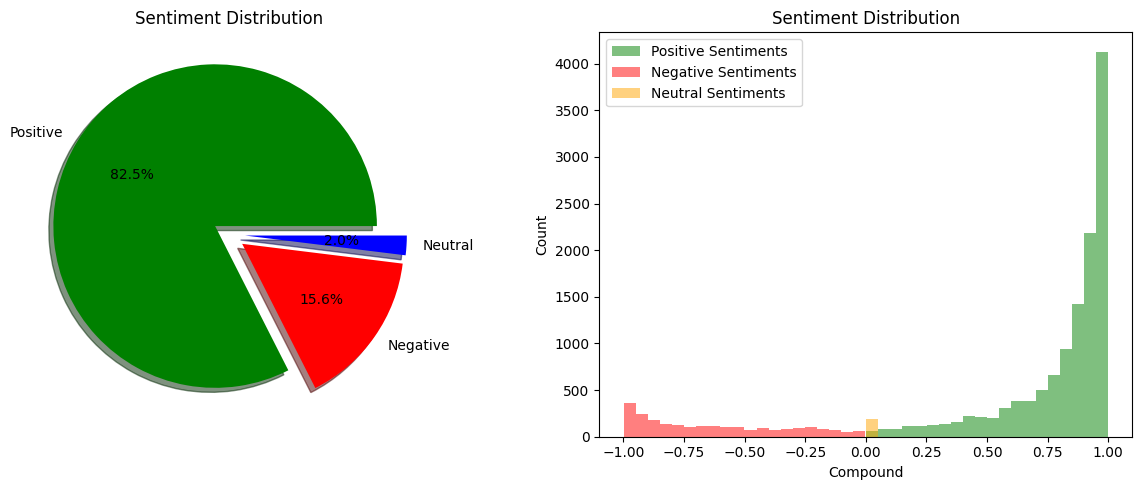

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and subplots with 1 row and 2 columns
plt.figure(figsize=(12, 5))

# Plot 1 - Pie chart for sentiment distribution
plt.subplot(1, 2, 1)
labels = ['Positive', 'Negative', 'Neutral']
sizes = data['Sentiment'].value_counts()
colors = ['green', 'red', 'blue']
explode = (0.1, 0.1, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('Sentiment Distribution')

# Plot 2 - Histogram for sentiment distribution
plt.subplot(1, 2, 2)
positive = data[data['compound'] > 0]['compound']
negative = data[data['compound'] < 0]['compound']
neutral = data[data['compound'] == 0]['compound']

sentiments = [positive, negative, neutral]
colors = ['green', 'red', 'orange']
labels = ['Positive Sentiments', 'Negative Sentiments', 'Neutral Sentiments']

for sentiment, color, label in zip(sentiments, colors, labels):
    plt.hist(sentiment, bins=20, color=color, alpha=0.5, label=label)

plt.title('Sentiment Distribution')
plt.xlabel('Compound')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()


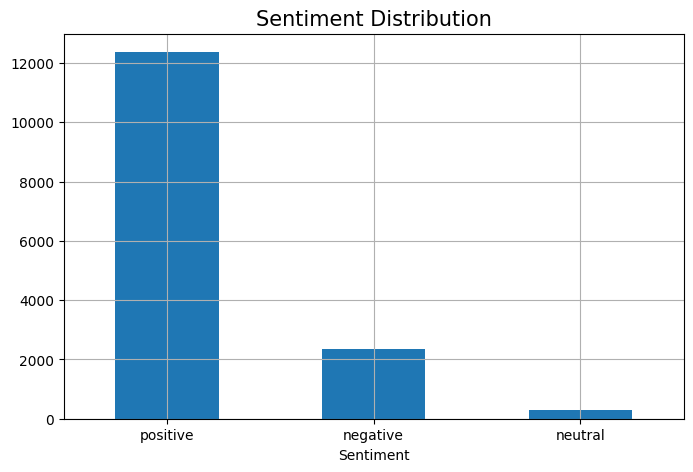

In [ ]:
data['Sentiment'].value_counts().plot(kind = 'bar', figsize = (8,5))
plt.xticks(rotation = 'horizontal')
plt.title('Sentiment Distribution',fontsize = 15)
plt.grid()
plt.show()

## Most number of **Positive** Reviews on the Books

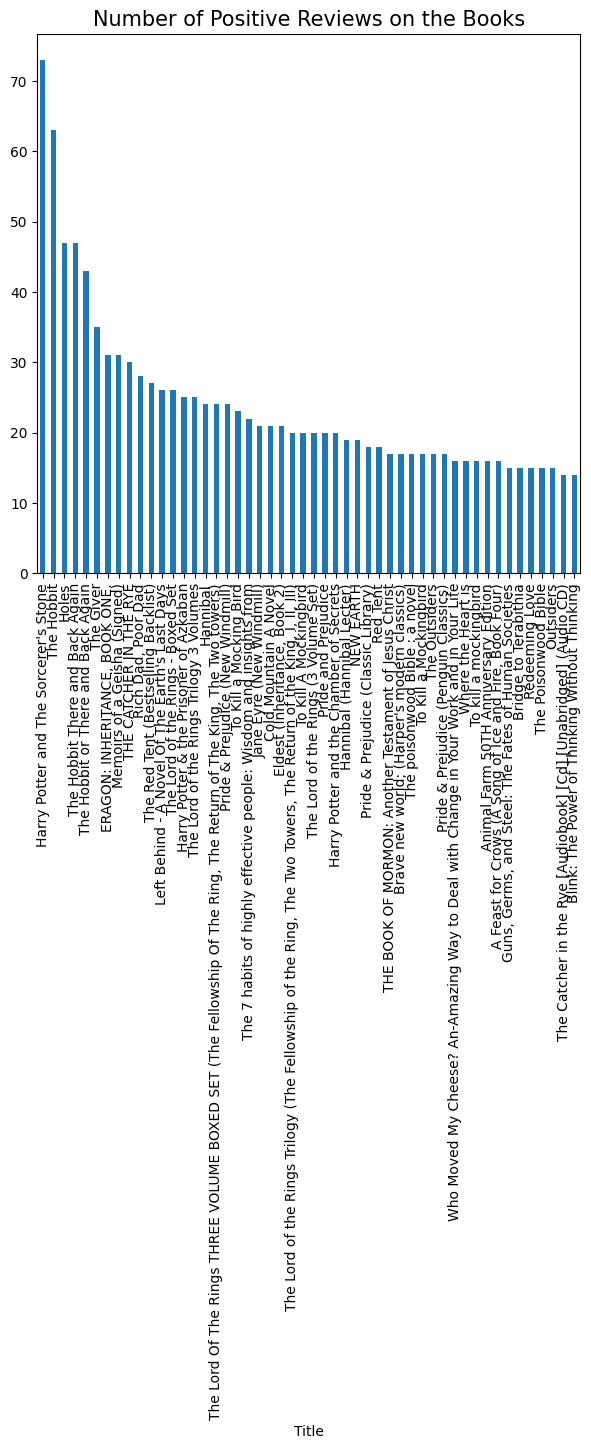

In [ ]:
data[data['Sentiment'] == 'positive']['Title'].value_counts().head(50).plot(kind = 'bar', figsize = (7,7))
plt.title('Number of Positive Reviews on the Books',fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

## Most number of **Neutral** Reviews on the Books

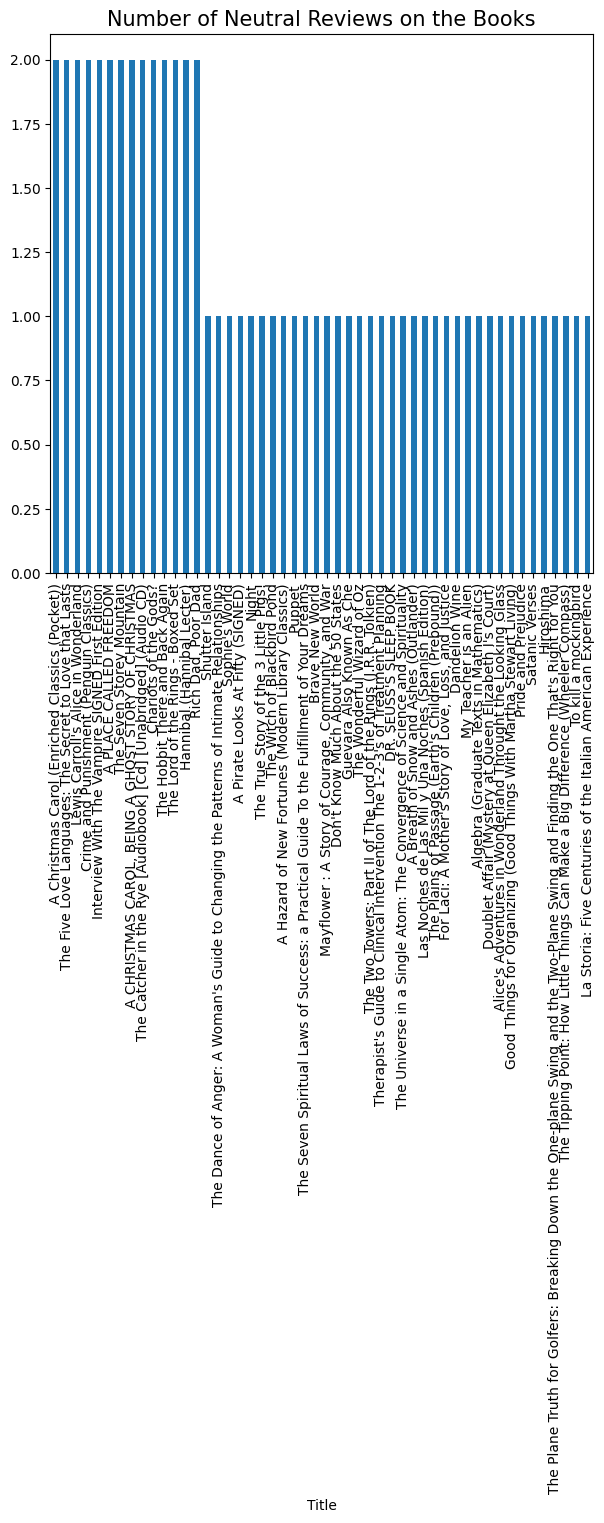

In [ ]:
data[data['Sentiment'] == 'neutral']['Title'].value_counts().head(50).plot(kind = 'bar', figsize = (7,7))
plt.title('Number of Neutral Reviews on the Books',fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

## Most number of **Negative** Reviews on the Books

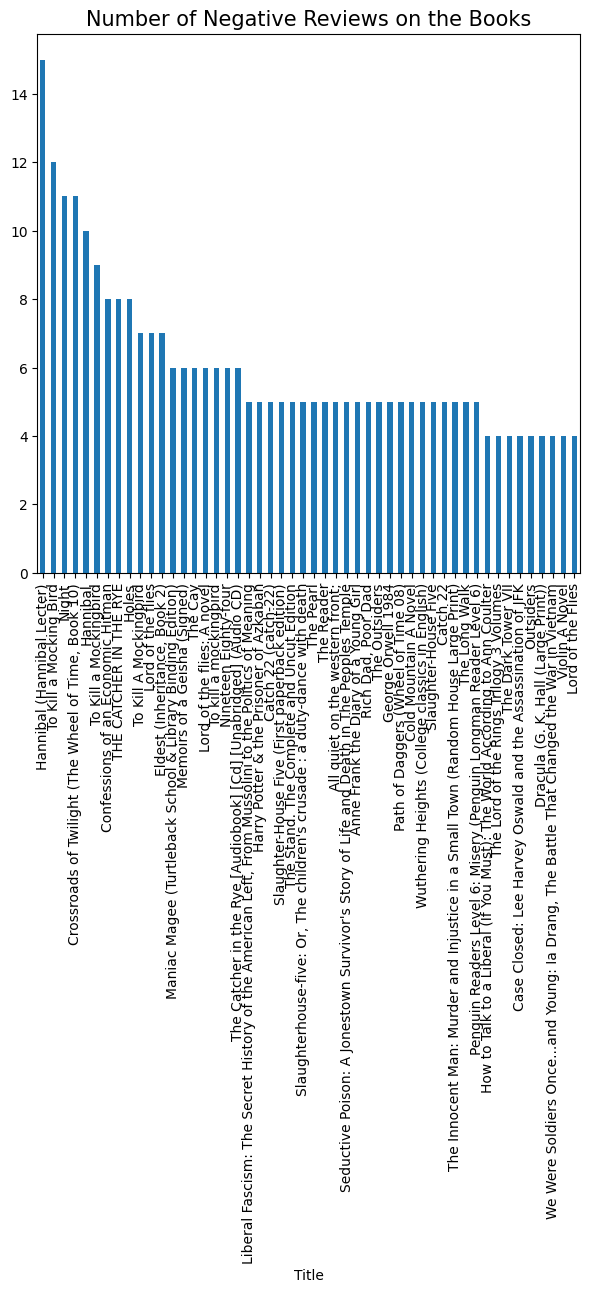

In [ ]:
data[data['Sentiment'] == 'negative']['Title'].value_counts().head(50).plot(kind = 'bar', figsize = (7,7))
plt.title('Number of Negative Reviews on the Books',fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

## Dataframe of Reviews vs Sentiments

In [ ]:
reviews_df = data[['clean_reviews', 'Sentiment']]

In [ ]:
reviews_df.head()

,clean_reviews,Sentiment
1247795,it's so much more than just about a boat named...,neutral
943881,i found this book to contain many of the best ...,positive
2252860,this book should become required reading for m...,positive
1389056,holes is about a boy named stanley yelnats and...,positive
2658806,a chance to have a readily-readable format ava...,positive


## Dividing Data into x & y

In [ ]:
x = reviews_df.drop(['Sentiment'], axis=1)
y = reviews_df['Sentiment']

In [ ]:
x.shape

(15000, 1)

In [ ]:
y.shape

(15000,)

# **text - preprocessing**

In [ ]:
import numpy as np # basic Libraries
import pandas as pd
import seaborn as sns
import nltk

In [ ]:
!pip install -U nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 16.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.8.1 which is incompatible.


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [ ]:
import re # regular expression module
stemmer = nltk.SnowballStemmer("english") # for stemming
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english')) # for stopword

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
import re, string, unicodedata
from string import punctuation

In [ ]:
def hapus_url(text):
    return re.sub(r'http\S+','', text)

def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-Z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

def lemmi(text):
    lemmatizer = WordNetLemmatizer()
    text=' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

def final_clean(text):
    final_text= []
    for i in text.split():
        if i.strip().lower() not in stopword and i.strip().lower().isalpha():
            final_text.append(i.strip().lower())
    return " ".join(final_text)

In [ ]:
def clean(text):
    text = hapus_url(text)
    text = remove_special_characters(text, remove_digits=True)
    text = lemmi(text)
    text = final_clean(text)
    return text

In [ ]:
import nltk
import subprocess

# Download and unzip wordnet
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

# Now you can import the NLTK resources as usual
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /kaggle/working/...
Archive:  /kaggle/working/corpora/wordnet.zip
   creating: /kaggle/working/corpora/wordnet/
  inflating: /kaggle/working/corpora/wordnet/lexnames  
  inflating: /kaggle/working/corpora/wordnet/data.verb  
  inflating: /kaggle/working/corpora/wordnet/index.adv  
  inflating: /kaggle/working/corpora/wordnet/adv.exc  
  inflating: /kaggle/working/corpora/wordnet/index.verb  
  inflating: /kaggle/working/corpora/wordnet/cntlist.rev  
  inflating: /kaggle/working/corpora/wordnet/data.adj  
  inflating: /kaggle/working/corpora/wordnet/index.adj  
  inflating: /kaggle/working/corpora/wordnet/LICENSE  
  inflating: /kaggle/working/corpora/wordnet/citation.bib  
  inflating: /kaggle/working/corpora/wordnet/noun.exc  
  inflating: /kaggle/working/corpora/wordnet/verb.exc  
  inflating: /kaggle/working/corpora/wordnet/README  
  inflating: /kaggle/working/corpora/wordnet/index.sense  
  inflating: /kaggle/working/corpora/wordnet/data.

In [ ]:
x["clean_reviews"] = x["clean_reviews"].apply(clean)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=0)

In [ ]:
x_train

,clean_reviews
919482,kahn book wa second book read history cryptolo...
618789,ordered book afer came across local library mo...
195821,wa grade early stumbled across book mother col...
15668,although good collection poe short story page ...
2215870,loved read hour book wa fictional purpose fict...
...,...
612682,already movie year barely watched youthfriends...
1336971,really liked book mostly take old fairy tale m...
207935,ostrogorsky ha put together good singlevolume ...
1086467,mickey spillane writes like dashiell hammett c...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer()  # You can adjust the max_features parameter

x_train_tfidf = tfidf_vectorizer.fit_transform(x_train['clean_reviews'])

# Transform the 'clean_reviews' column on the testing data
x_test_tfidf = tfidf_vectorizer.transform(x_test['clean_reviews'])

In [ ]:
x_train_tfidf_df = pd.DataFrame(x_train_tfidf.toarray())
x_test_tfidf_df =  pd.DataFrame(x_test_tfidf.toarray())

## Balancing Data

### Using Smote for Balancing Data

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train_bal, y_train_bal = oversample.fit_resample(x_train_tfidf, y_train)
y_train_bal.value_counts()

Sentiment
positive    9273
negative    9273
neutral     9273
Name: count, dtype: int64

In [ ]:
x_test_bal, y_test_bal = oversample.fit_resample(x_test_tfidf, y_test)
y_test_bal.value_counts()

Sentiment
positive    3098
negative    3098
neutral     3098
Name: count, dtype: int64

## **Model Training**

## 1) Logistic Regression

### Applying Logistic Regression on Imbalanced Data

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
log = LogisticRegression()
log.fit(x_train_tfidf_df, y_train)

LogisticRegression()

In [ ]:
perd_log=log.predict(x_test_tfidf_df)

In [ ]:
print(classification_report(perd_log, y_test))

              precision    recall  f1-score   support

    negative       0.22      0.85      0.35       150
     neutral       0.00      0.00      0.00         0
    positive       0.99      0.85      0.92      3600

    accuracy                           0.85      3750
   macro avg       0.41      0.57      0.42      3750
weighted avg       0.96      0.85      0.90      3750



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Applying Logistic Regression on Balanced Data

In [ ]:
log_bal = LogisticRegression()
log_bal.fit(x_train_bal, y_train_bal)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
perd_log_bal =log_bal.predict(x_test_bal)

In [ ]:
print(classification_report(perd_log_bal, y_test_bal))

              precision    recall  f1-score   support

    negative       0.71      0.68      0.70      3227
     neutral       0.08      0.85      0.14       278
    positive       0.92      0.49      0.64      5789

    accuracy                           0.57      9294
   macro avg       0.57      0.67      0.49      9294
weighted avg       0.82      0.57      0.64      9294



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test_bal,perd_log_bal)

array([[2198,   23,  877],
       [ 786,  237, 2075],
       [ 243,   18, 2837]])

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

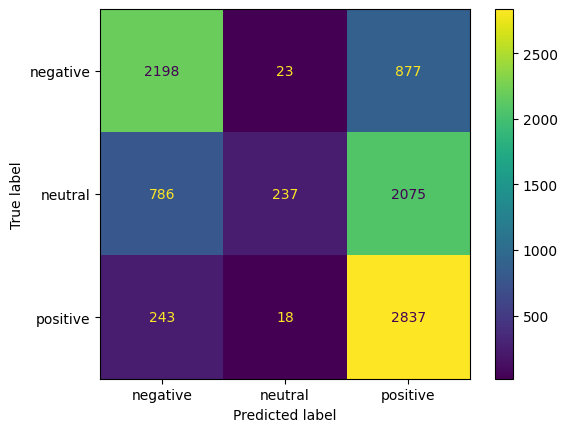

In [ ]:
cm = confusion_matrix(y_test_bal, perd_log_bal, labels=log.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log.classes_)
disp.plot()

## 2) Decision Tree

### Decision tree on imbalanced Data

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
classifier= DecisionTreeClassifier(criterion='entropy', random_state=45)
classifier.fit(x_train_tfidf_df, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=45)

In [ ]:
pred_tre = classifier.predict(x_test_tfidf_df)

In [ ]:
print(classification_report(pred_tre, y_test))

              precision    recall  f1-score   support

    negative       0.34      0.35      0.34       556
     neutral       0.15      0.19      0.17        64
    positive       0.87      0.86      0.87      3130

    accuracy                           0.78      3750
   macro avg       0.45      0.47      0.46      3750
weighted avg       0.78      0.78      0.78      3750



In [ ]:
confusion_matrix(y_test,pred_tre)

array([[ 193,   10,  369],
       [  13,   12,   55],
       [ 350,   42, 2706]])

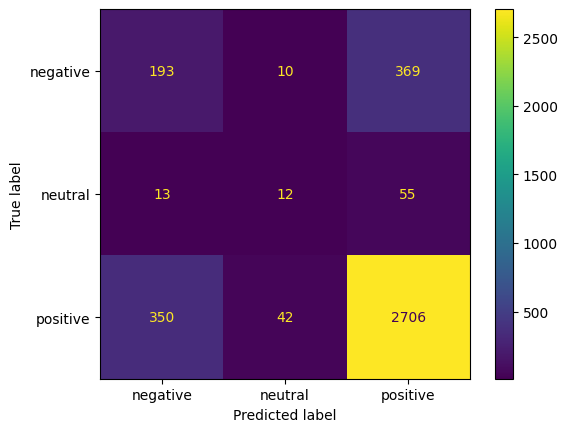

In [ ]:
cm = confusion_matrix(y_test, pred_tre, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()

### Decision tree on balanced data

In [ ]:
classifier_bal= DecisionTreeClassifier(criterion='entropy', random_state=45)
classifier_bal.fit(x_train_bal, y_train_bal)

DecisionTreeClassifier(criterion='entropy', random_state=45)

In [ ]:
pred_tre_bal = classifier_bal.predict(x_test_bal)

In [ ]:
print(classification_report(pred_tre_bal, y_test_bal))

              precision    recall  f1-score   support

    negative       0.51      0.52      0.52      3013
     neutral       0.14      0.62      0.23       712
    positive       0.81      0.45      0.58      5569

    accuracy                           0.49      9294
   macro avg       0.49      0.53      0.44      9294
weighted avg       0.66      0.49      0.53      9294



In [ ]:
confusion_matrix(y_test_bal,pred_tre_bal)

array([[1578,  171, 1349],
       [ 937,  442, 1719],
       [ 498,   99, 2501]])

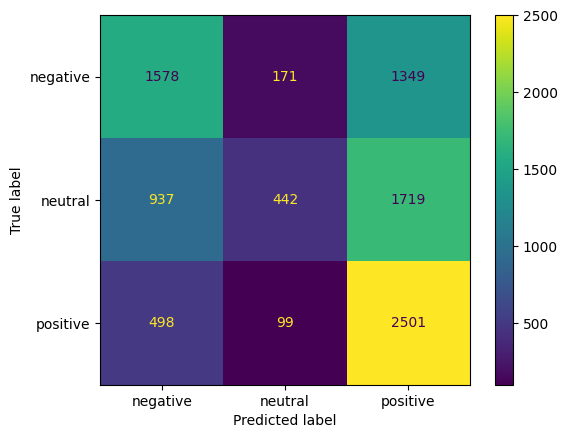

In [ ]:
cm = confusion_matrix(y_test_bal, pred_tre_bal, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()

## 3) Naive Bayes

### Naive bayes on imbalanced Data

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [ ]:
nb.fit(x_train_tfidf_df, y_train)

GaussianNB()

In [ ]:
pred_nb = nb.predict(x_test_tfidf_df)

In [ ]:
print(classification_report(pred_nb, y_test))

              precision    recall  f1-score   support

    negative       0.29      0.15      0.20      1086
     neutral       0.04      0.09      0.05        34
    positive       0.70      0.83      0.76      2630

    accuracy                           0.63      3750
   macro avg       0.34      0.36      0.34      3750
weighted avg       0.58      0.63      0.59      3750



### Naive Bayes on Balanced Data

In [ ]:
import numpy as np

# Assuming x_train_bal is your sparse matrix
x_train_bal_dense = x_train_bal.toarray()

# Then proceed with fitting the model using the dense array
nb_bal = GaussianNB()
nb_bal.fit(x_train_bal_dense, y_train_bal)

GaussianNB()

In [ ]:
pred_nb_bal = nb_bal.predict(x_test_bal.toarray())

In [ ]:
print(classification_report(pred_nb_bal, y_test_bal))

              precision    recall  f1-score   support

    negative       0.21      0.26      0.23      2450
     neutral       0.00      0.28      0.01        43
    positive       0.71      0.32      0.44      6801

    accuracy                           0.31      9294
   macro avg       0.31      0.29      0.23      9294
weighted avg       0.57      0.31      0.38      9294



## 4) RandomForest

### RandomForest on Imbalanced Data

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
x_train_tfidf_df.shape

(11250, 63144)

In [ ]:
x_test_tfidf_df.shape

(3750, 63144)

In [ ]:
ran=RandomForestClassifier(n_estimators=100)
ran.fit(x_train_tfidf_df,y_train)

RandomForestClassifier()

In [ ]:
perd_ran=ran.predict(x_test_tfidf_df)

In [ ]:
perd_ran.shape

(3750,)

In [ ]:
confusion_matrix(y_test,perd_ran)

array([[  21,    0,  551],
       [   1,    0,   79],
       [   2,    0, 3096]])

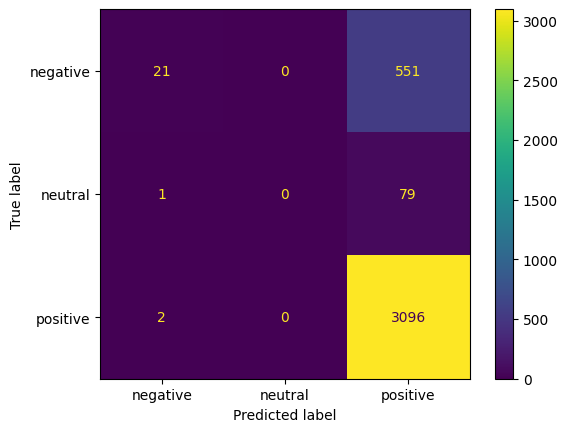

In [ ]:
cm = confusion_matrix(y_test, perd_ran, labels=ran.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=ran.classes_)
disp.plot()

In [ ]:
y_test.shape , perd_ran.shape

((3750,), (3750,))

In [ ]:
print(classification_report(perd_ran, y_test))

              precision    recall  f1-score   support

    negative       0.04      0.88      0.07        24
     neutral       0.00      0.00      0.00         0
    positive       1.00      0.83      0.91      3726

    accuracy                           0.83      3750
   macro avg       0.35      0.57      0.33      3750
weighted avg       0.99      0.83      0.90      3750



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### RandomForest on balanced Data

In [ ]:
ran_bal=RandomForestClassifier(n_estimators=100)
ran_bal.fit(x_train_bal,y_train_bal)
perd_ran_bal=ran_bal.predict(x_test_bal)

In [ ]:
confusion_matrix(y_test_bal,perd_ran_bal)

array([[1374,    1, 1723],
       [ 274,    2, 2822],
       [ 109,    0, 2989]])

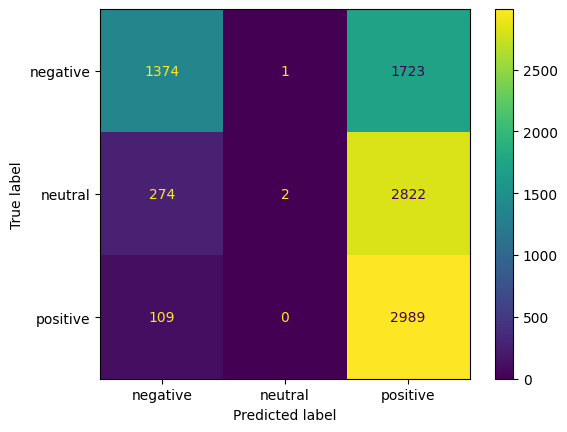

In [ ]:
cm = confusion_matrix(y_test_bal, perd_ran_bal, labels=ran.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=ran.classes_)
disp.plot()

In [ ]:
print(classification_report(perd_ran_bal, y_test_bal))

              precision    recall  f1-score   support

    negative       0.44      0.78      0.57      1757
     neutral       0.00      0.67      0.00         3
    positive       0.96      0.40      0.56      7534

    accuracy                           0.47      9294
   macro avg       0.47      0.62      0.38      9294
weighted avg       0.87      0.47      0.56      9294



### Saving the best model

In [ ]:
import pickle

In [ ]:
pickle.dump(log_bal, open('log_bal.pkl','wb'))

In [ ]:
with open('log_bal','wb') as f:
  pickle.dump(log_bal,f)

In [ ]:
with open('log_bal','rb') as f:
  mp=pickle.load(f)

In [ ]:
def predict(text):
  input_text = [text]
  text_to_vec = tfidf_vectorizer.transform(input_text).toarray()
  prediction = mp.predict(text_to_vec)
  return prediction

In [ ]:
User_input = input("Enter your text:")
output = predict(User_input)
print(output)

Enter your text: hi I am fine


['neutral']
